# Reading NetCDF files

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(r'C:\Users\sergi\Documents\repos\geopy\geopy')

import reader
import image
import plot
import enums

In [2]:
import warnings

warnings.filterwarnings("ignore")

Helpers

In [3]:
filename = r"D:\batimetria\algarve\satelite\local_original\Armona\20180912_S2B_AGV_29SPA_L2W.nc"

def load_image() -> image.Image:
    return reader.open(filename)

def plot_band(img : image.Image, band_name) -> None:
    fig, ax = plot.get_geofigure(img.crs, 1, 1)
    ax, mappable = plot.plot_band(img, band_name, ax = ax)
    ax = plot.add_gridlines(ax)
    fig.colorbar(mappable, label = band_name)

    return ax

In [4]:
raster : image.Image = load_image()
raster

Bands: ['Rrs_442', 'Rrs_492', 'Rrs_559', 'Rrs_665', 'Rrs_704', 'Rrs_739', 'Rrs_780', 'Rrs_833', 'Rrs_864', 'Rrs_1610', 'Rrs_2186', 'l2_flags', 'SPM_Nechad2016_665', 'SPM_Nechad2016_704', 'SPM_Nechad2016_739', 'TUR_Nechad2016_665', 'TUR_Nechad2016_704', 'TUR_Nechad2016_739', 'chl_oc2', 'chl_oc3', 'chl_re_gons', 'chl_re_gons740', 'chl_re_mishra', 'chl_re_moses3b', 'chl_re_moses3b740', 'ndci', 'fai', 'fait', 'ndwi'] | Height: 707 | Width: 1124

## Access properties

In [5]:
raster.width

1124

In [6]:
raster.height

707

In [7]:
raster.band_names[:5]

['Rrs_442', 'Rrs_492', 'Rrs_559', 'Rrs_665', 'Rrs_704']

In [8]:
raster.transform

Affine(10.0, 0.0, 602330.0,
       0.0, -10.0, 4099260.0)

In [9]:
raster.crs

<Projected CRS: PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["Wor ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Data manipulation

In [10]:
raster.rename_by_enum(enums.SENTINEL2_BANDS)
raster.band_names[:5]

['Rrs_B1', 'Rrs_B2', 'Rrs_B3', 'Rrs_B4', 'Rrs_B5']

## Raster operations

### Resample

In [11]:
raster.resample(scale = 2, downscale = True)
raster.transform

Affine(20.0, 0.0, 602330.0,
       0.0, -20.0, 4099260.0)

### Change de CRS

In [12]:
import cartopy
import cartopy.crs

raster.reproject(cartopy.crs.Mercator())
raster.transform

Affine(24.96727671881672, 0.0, -873888.0193230037,
       0.0, -24.967276719398797, 4418093.425544091)

### Mask using geometries

In [13]:
import geopandas as gpd

raster : image.Image = load_image()
raster.rename_by_enum(enums.SENTINEL2_BANDS)
shapes = gpd.read_file(r"D:\repos\geopy_usage\areas\armona.json").to_crs(raster.crs).geometry
shapes

0    POLYGON ((602227.983 4099102.643, 611710.254 4...
Name: geometry, dtype: geometry

(<GeoAxes: >, <cartopy.mpl.gridliner.Gridliner at 0x28a5c4bd390>)

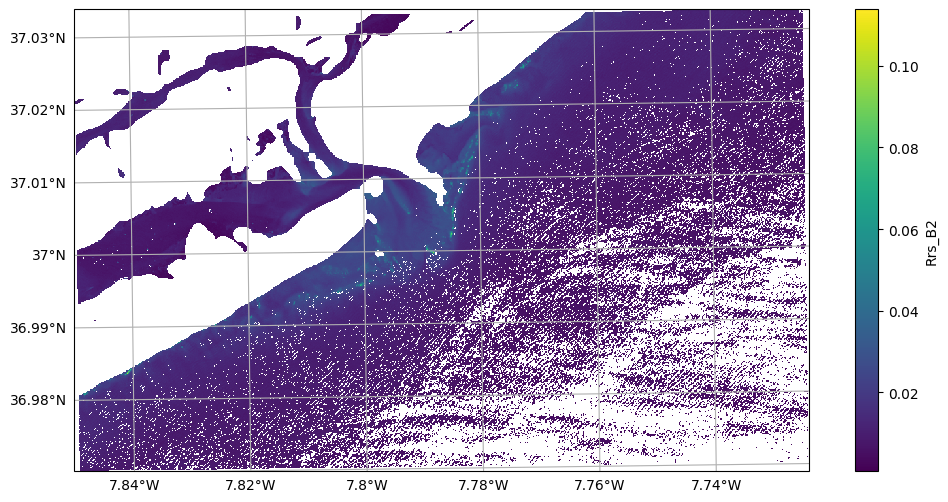

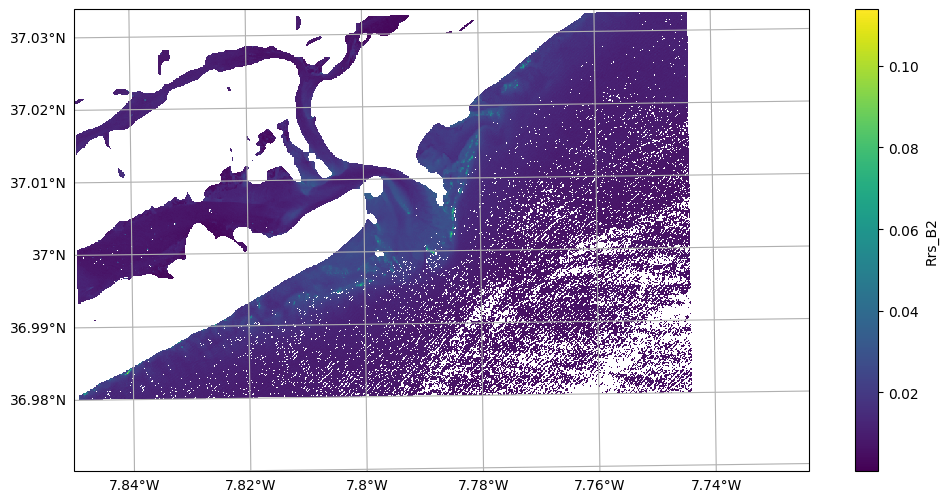

In [14]:
plot_band(raster, "Rrs_B2")

raster.geometry_mask(shapes)

plot_band(raster, "Rrs_B2")

### Delete empty rows & cols

(<GeoAxes: >, <cartopy.mpl.gridliner.Gridliner at 0x28a5cbc9f50>)

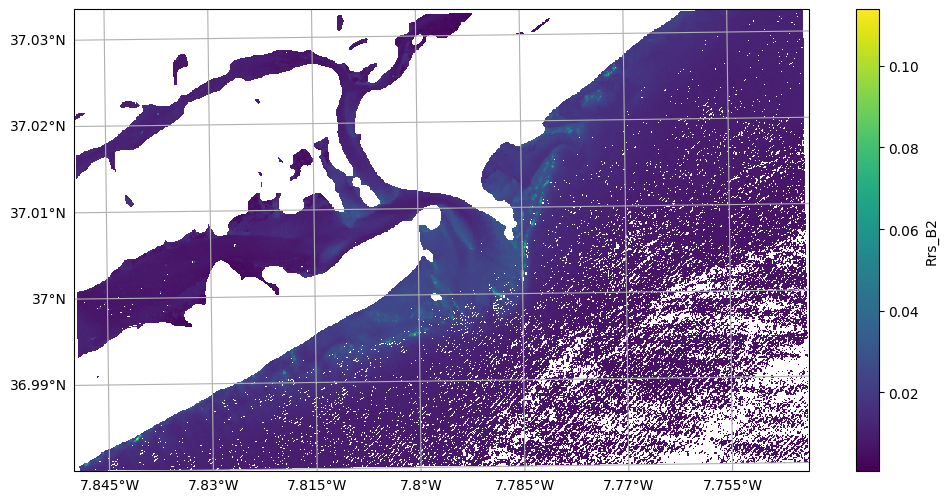

In [15]:
raster.dropna()

plot_band(raster, "Rrs_B2")

### Clip by geometry

(<GeoAxes: >, <cartopy.mpl.gridliner.Gridliner at 0x28a5b89e390>)

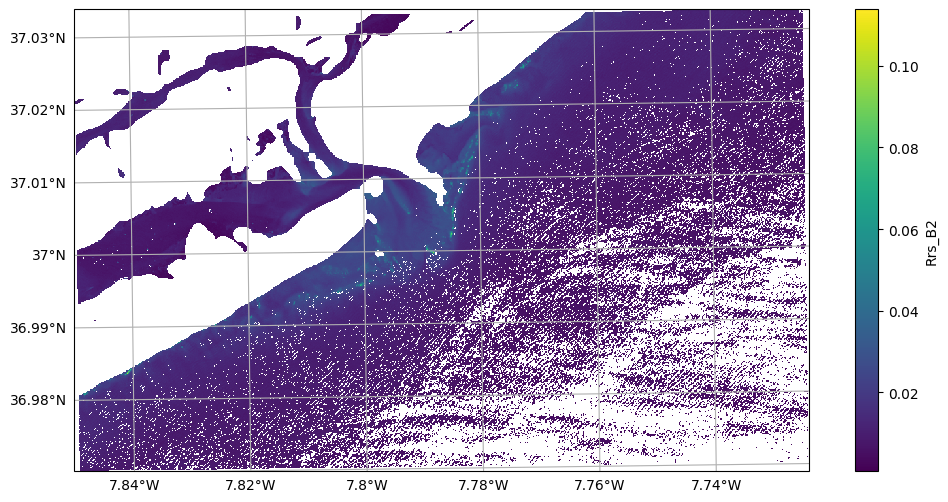

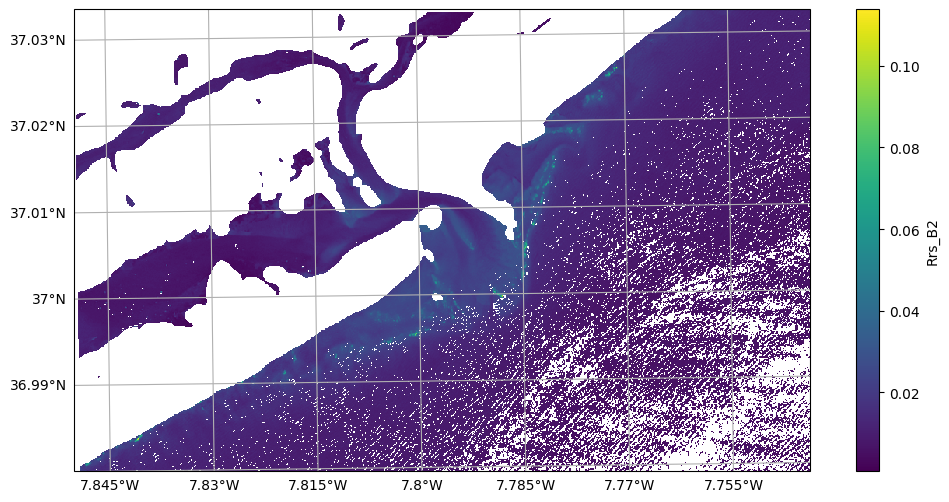

In [16]:
raster : image.Image = load_image()
raster.rename_by_enum(enums.SENTINEL2_BANDS)

plot_band(raster, "Rrs_B2")

raster.clip(shapes)

plot_band(raster, "Rrs_B2")

## Plots

### Single Band

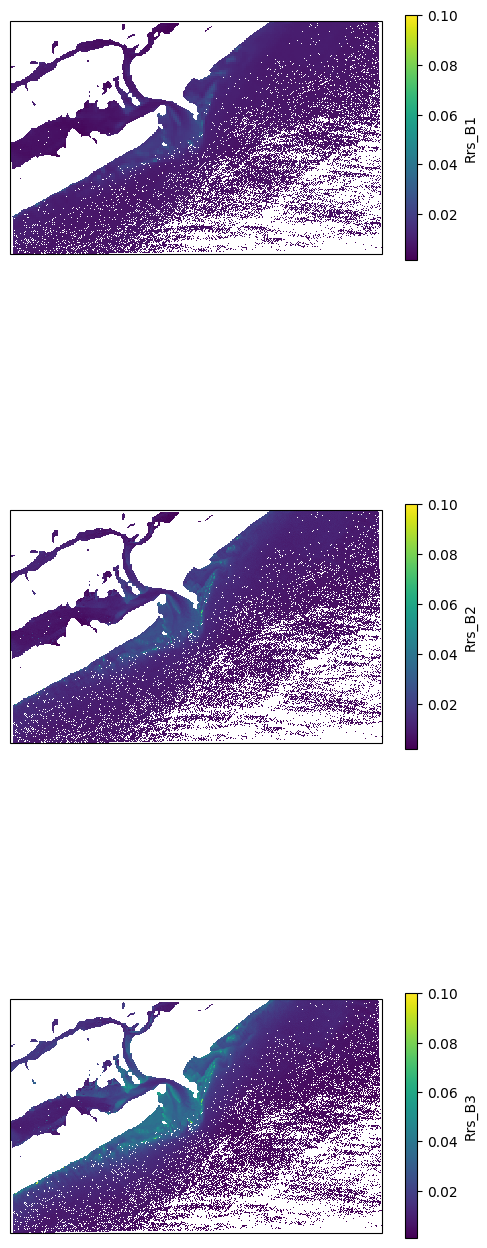

In [17]:
raster : image.Image = load_image()
raster.rename_by_enum(enums.SENTINEL2_BANDS)
raster.resample(scale = 2, downscale = True)

fig, axs = plot.get_geofigure(raster.crs, len(raster.band_names[:3]), 1, figsize = (6, 6 * len(raster.band_names[:3])))

for ax, band_name in zip(axs, raster.band_names[:3]):
    ax, mappable = plot.plot_band(raster, band_name, ax = ax, vmax = 0.1)
    fig.colorbar(mappable, label = band_name, shrink = 0.6)

### RGB (True color)

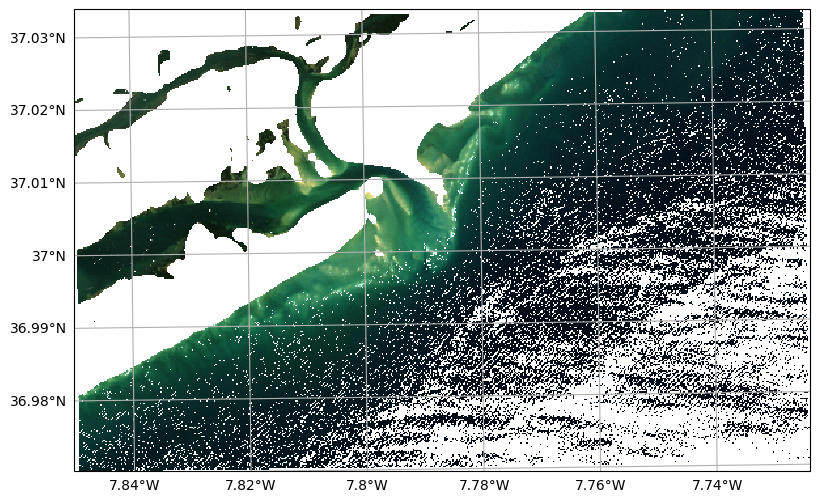

In [18]:
fig, ax = plot.get_geofigure(raster.crs, 1, 1)
ax = plot.plot_rgb(raster, 'Rrs_B4', 'Rrs_B3', 'Rrs_B2', ax = ax, brightness = 15)
ax = plot.add_gridlines(ax)

### False composite

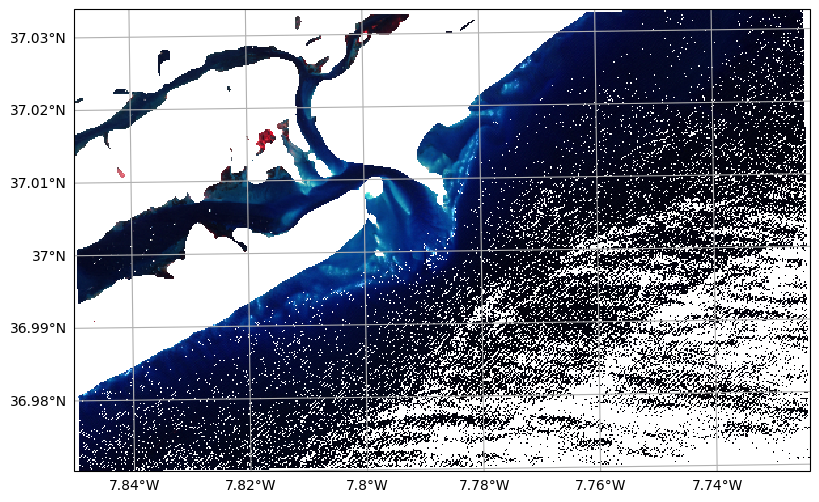

In [19]:
fig, ax = plot.get_geofigure(raster.crs, 1, 1)
ax = plot.plot_rgb(raster, 'Rrs_B8', 'Rrs_B4', 'Rrs_B3', ax = ax, brightness = 15)
ax = plot.add_gridlines(ax)